In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Book1.csv')

In [3]:
# df.head() #prints first 5 coloumns of data 
# df.info() #gives information about coloumn and we can check if there is any missing attribute
# df['CHAS'].value_counts()
# df.describe()

In [4]:
import matplotlib as plt

In [5]:
# df.hist(bins = 40, figsize= (20,20))

## Training and Testing data using 3 different approaches and understanding their dis-advatages

1. By making function and calling it

In [6]:
# def split_train_test(data, test_ratio):
#     np.random.seed(42)
#     shuffled = np.random.permutation(len(data))
#     test_set_size = int(len(data) * test_ratio)
#     test_indices = shuffled[:test_set_size]
#     train_indices = shuffled[test_set_size:]
#     return (data.iloc[train_indices], data.iloc[test_indices])

In [7]:
# train_variable, test_variable = split_train_test(df, 0.2)
# test_variable
# train_variable

2. By calling an in-built function in sklearn 

In [8]:
# from sklearn.model_selection import train_test_split
# train_set , test_set = train_test_split(df, test_size = 0.2, random_state=42)
# print(train_set, test_set)

3. Using stratified sampling 

In [9]:
from sklearn.model_selection import StratifiedShuffleSplit
sp = StratifiedShuffleSplit(n_splits= 1, test_size= 0.2, random_state= 42)
for train_index, test_index in sp.split(df,df['CHAS']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [10]:
strat_train_set

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.53501,0.0,19.58,1,0.871,6.152,82.6,1.7455,5,403,14.7,88.01,15.02,15.6
423,7.05042,0.0,18.10,0,0.614,6.103,85.1,2.0218,24,666,20.2,2.52,23.29,13.4
98,0.08187,0.0,2.89,0,0.445,7.820,36.9,3.4952,2,276,18.0,393.53,3.57,43.8
455,4.75237,0.0,18.10,0,0.713,6.525,86.5,2.4358,24,666,20.2,50.92,18.13,14.1


In [11]:
strat_test_set

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
342,0.02498,0.0,1.89,0,0.518,6.540,59.7,6.2669,1,422,15.9,389.96,8.65,16.5
379,17.86670,0.0,18.10,0,0.671,6.223,100.0,1.3861,24,666,20.2,393.74,21.78,10.2
223,0.61470,0.0,6.20,0,0.507,6.618,80.8,3.2721,8,307,17.4,396.90,7.60,30.1
219,0.11425,0.0,13.89,1,0.550,6.373,92.4,3.3633,5,276,16.4,393.74,10.50,23.0
48,0.25387,0.0,6.91,0,0.448,5.399,95.3,5.8700,3,233,17.9,396.90,30.81,14.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,0.05660,0.0,3.41,0,0.489,7.007,86.3,3.4217,2,270,17.8,396.90,5.50,23.6
466,3.77498,0.0,18.10,0,0.655,5.952,84.7,2.8715,24,666,20.2,22.01,17.15,19.0
52,0.05360,21.0,5.64,0,0.439,6.511,21.1,6.8147,4,243,16.8,396.90,5.28,25.0
121,0.07165,0.0,25.65,0,0.581,6.004,84.1,2.1974,2,188,19.1,377.67,14.27,20.3


In [12]:
strat_train_set['CHAS'].value_counts(0)

0    376
1     28
Name: CHAS, dtype: int64

In [13]:
df = strat_train_set.copy()

# Looking for Co-relations

In [14]:
corr_matrix = df.corr()
corr_matrix['MEDV'].sort_values(ascending= False)

MEDV       1.000000
RM         0.679894
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

## PLOTTING CO-RELATIONS WITH PANDAS

In [15]:
from pandas import plotting

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='CHAS', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='CHAS'>,
        <AxesSubplot:xlabel='CHAS', ylabel='CHAS'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='CHAS'>,
        <AxesSubplot:xlabel='ZN', ylabel='CHAS'>,
        <AxesSubplot:xlabel='RM', ylabel='CHAS'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='CHAS', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='CHAS', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:x

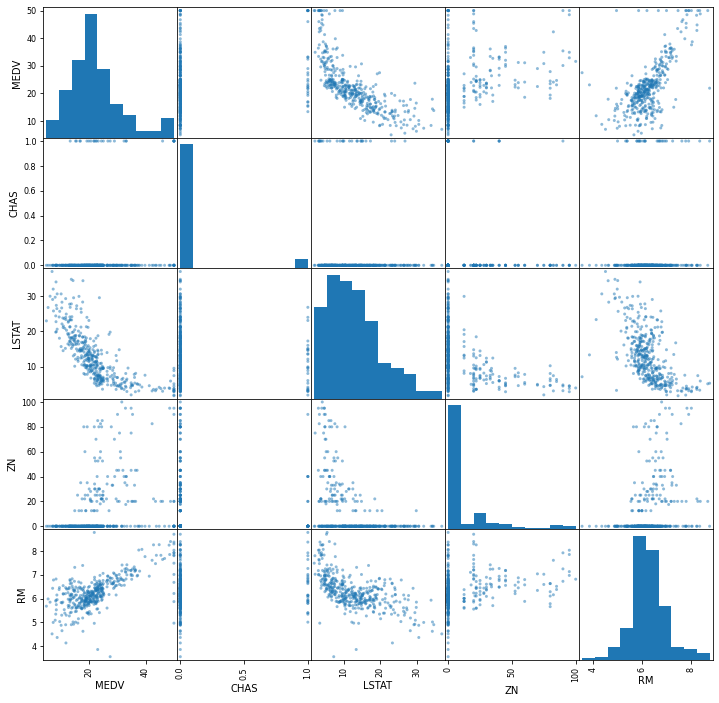

In [16]:
attributes = ['MEDV', 'CHAS', 'LSTAT', 'ZN', 'RM']
plotting.scatter_matrix(df[attributes], figsize= (12,12))

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

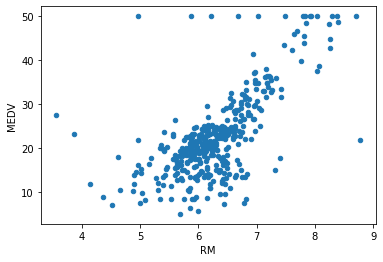

In [17]:
df.plot(kind='scatter', x='RM', y='MEDV')

In [18]:
# df.describe()

## To diffrentiate features and labels in two different variables

In [19]:
df = strat_train_set.drop('MEDV', axis =1)
df_labels = strat_train_set['MEDV'].copy()
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.53501,0.0,19.58,1,0.871,6.152,82.6,1.7455,5,403,14.7,88.01,15.02
423,7.05042,0.0,18.10,0,0.614,6.103,85.1,2.0218,24,666,20.2,2.52,23.29
98,0.08187,0.0,2.89,0,0.445,7.820,36.9,3.4952,2,276,18.0,393.53,3.57
455,4.75237,0.0,18.10,0,0.713,6.525,86.5,2.4358,24,666,20.2,50.92,18.13


## Scikit Learn Design

Primarily, three types of objects

Estimators - It estimates some parameter based on a dataset. Eg. imputer. It has a fit method and transform method. Fit method - Fits the dataset and calculates internal parameters

Transformers - transform method takes input and returns output based on the learnings from fit(). It also has a convenience function called fit_transform() which fits and then transforms.

Predictors - LinearRegression model is an example of predictor. fit() and predict() are two common functions. It also gives score() function which will evaluate the predictions

## Feature Scaling

# Creating a pipeline

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = "median")),
    ('std_scaler', StandardScaler()),
])

In [21]:
df_num_tr = my_pipeline.fit_transform(df)

In [22]:
df_num_tr

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

In [23]:
df_num_tr.shape
# df_labels.shape

(404, 13)

# Selecting a desired model

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [25]:
# model = DecisionTreeRegressor()
# model = LinearRegression()
model = RandomForestRegressor()
model.fit(df_num_tr, df_labels)

RandomForestRegressor()

In [26]:
# df_test = strat_test_set.drop('MEDV', axis =1)  #LOCHA
# df_test_labels = strat_test_set['MEDV'].copy()

In [27]:
some_data = df.iloc[:5]

In [28]:
some_labels=df_labels.iloc[:5]


In [29]:
prepared_data = my_pipeline.transform(some_data)

In [30]:
model.predict(prepared_data)

array([22.418, 25.476, 16.283, 23.413, 23.547])

In [31]:
some_labels

254    21.9
348    24.5
476    16.7
321    23.1
326    23.0
Name: MEDV, dtype: float64

## Evaluating the model

In [32]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(df_num_tr)
mse = mean_squared_error(df_labels, housing_predictions)
rmse = np.sqrt(mse)

In [33]:

rmse

1.245318510690862

In [34]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

## Using better evaluation technique - Cross Validation

In [35]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, df_num_tr, df_labels, scoring ="neg_mean_squared_error", cv =10)
rmse_scores = np.sqrt(-scores)

In [36]:
rmse_scores

array([2.87350736, 2.85997828, 4.34756015, 2.71284275, 3.49819758,
       2.73716495, 4.70656921, 3.37099699, 3.08868313, 3.28179794])

In [37]:
def print_scores(scores):
    print(f"Scores are {scores}")
    print(f"Mean: {scores.mean()}")
    print(f"Std: {scores.std()}")
print_scores(rmse_scores)

Scores are [2.87350736 2.85997828 4.34756015 2.71284275 3.49819758 2.73716495
 4.70656921 3.37099699 3.08868313 3.28179794]
Mean: 3.3477298332088785
Std: 0.6464827013242871


## Saving Data

In [38]:
from joblib import dump, load
dump(model, 'RealEstate.joblib')

['RealEstate.joblib']

## Testing data

In [39]:
X_test = strat_test_set.drop('MEDV', axis =1)
Y_test = strat_test_set['MEDV'].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_prediction= model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_prediction)
final_rmse = np.sqrt(final_mse)


In [40]:
strat_test_set

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
342,0.02498,0.0,1.89,0,0.518,6.540,59.7,6.2669,1,422,15.9,389.96,8.65,16.5
379,17.86670,0.0,18.10,0,0.671,6.223,100.0,1.3861,24,666,20.2,393.74,21.78,10.2
223,0.61470,0.0,6.20,0,0.507,6.618,80.8,3.2721,8,307,17.4,396.90,7.60,30.1
219,0.11425,0.0,13.89,1,0.550,6.373,92.4,3.3633,5,276,16.4,393.74,10.50,23.0
48,0.25387,0.0,6.91,0,0.448,5.399,95.3,5.8700,3,233,17.9,396.90,30.81,14.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,0.05660,0.0,3.41,0,0.489,7.007,86.3,3.4217,2,270,17.8,396.90,5.50,23.6
466,3.77498,0.0,18.10,0,0.655,5.952,84.7,2.8715,24,666,20.2,22.01,17.15,19.0
52,0.05360,21.0,5.64,0,0.439,6.511,21.1,6.8147,4,243,16.8,396.90,5.28,25.0
121,0.07165,0.0,25.65,0,0.581,6.004,84.1,2.1974,2,188,19.1,377.67,14.27,20.3



# Final RMSE

In [41]:
final_rmse

2.9705333333113297

In [42]:
Y_test_final = Y_test.values

In [43]:
new_data = pd.DataFrame({"real": Y_test_final, "predicted": final_prediction})
new_data

,real,predicted
0,16.5,25.105
1,10.2,11.126
2,30.1,26.068
3,23.0,21.474
4,14.4,18.837
...,...,...
97,23.6,31.228
98,19.0,14.694
99,25.0,26.509
100,20.3,21.459


In [44]:
# pd.set_option('display.max_rows', None)
# # pd.set_option('display.max_columns', None)


# new_data.head


# Using Model

In [45]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24141041, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])

In [46]:
modell = load('RealEstate.joblib')
features = np.array([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24141041, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034]])
modell.predict(features)

array([22.418])